- 레이블이 없는 데이터로 훈련하는 학습 방법
- ex) 군집, 이상치 탐지, 밀도 추정
- KMeans에서 교육목적으로 매개변수를 지정..
    - init="random"
    - algorithm="full"

In [42]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

#9.1 군집

**군집(클러스터링)**

- 비슷한 샘플을 구별해 하나의 **클러스터**혹은 비슷한 샘플의 그룹으로 할당하는 작업

###분류 _vs_ 군집

- 분류 : 지도 학습
- 군집 : 비지도 학습
- 붓꽃 데이터셋으로 비교해보자..

In [2]:
#붓꽃 데이터셋 불러오기

from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target

In [3]:
#특성 이름..
print(data.feature_names)

#타깃 이름..
print(data.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


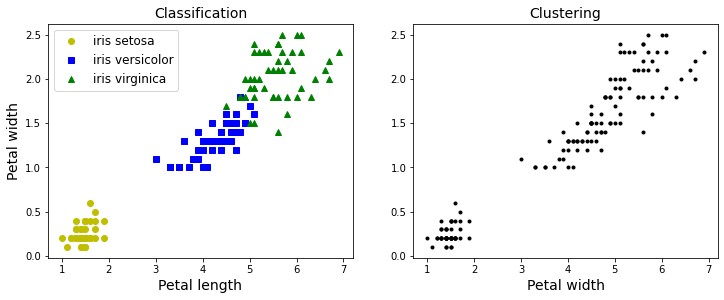

In [4]:
plt.figure(figsize=(12, 4.3))

plt.subplot(121)
#2,3번 특성만을 가지고 레이블마다 모양을 다르게 그리겠다..
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="iris virginica")
plt.title("Classification", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
#그냥 레이블 관계없이 그린다..
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.title("Clustering", fontsize=14)
plt.xlabel("Petal width", fontsize=14)
#plt.tick_params(labelleft=False)

plt.show()

**분석**

- 왼쪽은 분류.. 오른쪽은 군집..
- 오른쪽 그림에서 오른쪽위의 데이터는 두 종류의 데이터로 이루어졌는지 알기 어렵다..
- 지금은 특성 2개만 사용했는데, 나머지 특성도 쓰면 더 잘 구분할 것이다..
- ex)가우시안 혼합 모델을 사용하면 좋다..

###군집의 사용범위

- **고객 분류**
    - 추천 시스템
- **데이터 분석**
- **차원 축소 기법**
    - 군집을 하면 데이터들의 각 클러스터에 대한 샘플의 **친화성**을 측정..
    - 원래 $n$차원에서 클러스터의 갯수만큼의 차원으로 축소되는 효과을 얻음
- **이상치 탐지**
    - 부정거래 감지에 이용..
- **준지도 학습**
    - 레이블된 샘플이 적을때 사용..
    - 동일한 클러스터에 있는 모든 샘플에 레이블 전파 가능..
- 검색 엔진
- 이미지 분할

###군집 정리

- 보편적인 정의는 없다..
- 상황에 따라 다름!
- 알고리즘에 따라 다른 종류의 클러스터를 감지한다
    - 1) **센트로이드**를 중심으로 모인 샘플을 찾는다
    - 2) 샘플이 밀집되어 연속된 영역을 찾는다
    - 3) 계층적으로 클러스터의 클러스터를 찾는다..
    - 기타 등등..
- 이러한 알고리즘의 종류가 아주 많다..

##9.1.1 k-평균

###make_blobs 데이터 셋으로 확인..

####데이터 준비

In [5]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[0.2, 2.3],
     [-1.5, 2.3],
     [-2.8, 1.8],
     [-2.8, 2.8],
     [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [6]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [7]:
#데이터 그리는 함수..

def plot_clusters(X, y=None):
    plt.scatter(X[:,0], X[:,1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

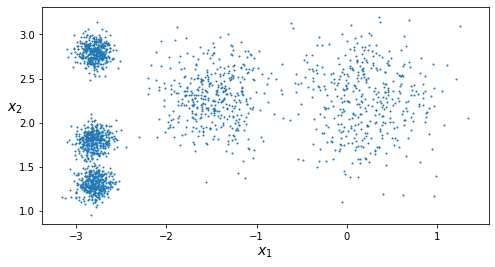

In [8]:
#샘플덩어리 다섯 개로 이루어진 레이블 없는 데이터 셋..

plt.figure(figsize=(8,4))
plot_clusters(X)

plt.show()

####훈련 및 예측

- KMeans 모델 사용
- 원래는 클러스터 갯수(k)도 모른다..
- 여기서는 5로 지정해서 함..

In [9]:
from sklearn.cluster import KMeans

#클러스터 5개로 지정
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
#훈련 및 예측
y_pred = kmeans.fit_predict(X)

In [10]:
#여기서 예측은 샘플이 속한 클러스터의 인덱스를 나타냄..

print(y_pred)
print(y_pred.shape)

[4 1 0 ... 3 0 1]
(2000,)


In [11]:
y_pred is kmeans.labels_

True

In [12]:
#센트로이드 5개 확인..
#책과 순서만 다름

kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

새로운 샘플의 레이블 예측도 가능!

In [13]:
#제일 가까운거 예측..
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

kmeans.predict(X_new)

array([0, 0, 3, 3], dtype=int32)

####결정 경계

In [14]:
#데이터 그리는 함수..
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

#센트로이드를 그리는 함수..
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None: #가중치 있을 때..
        centroids = centroids[weights > weights.max() / 10]
    
    #센트로이드 지점은 O위에 X로 점을 찍는다..
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12, 
                color=cross_color, zorder=11, alpha=1)

#결정경계를 그리는 함수..
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    #그림 그린다..
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    
    #데이터는 그냥 그린다..
    plot_data(X)

    #기타 선택사항.. 기본값은 모두 True
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

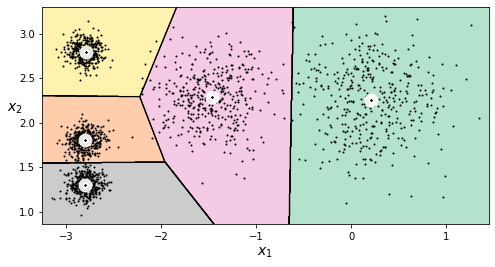

In [15]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

plt.show()

**분석**

- 보노로이 다이어그램임..
- 대부분 잘 분류되었다..
- 몇 개의 샘플은 잘못 분류되었다... (경계 부근의 샘플들)
- k-평균 알고리즘은 **클러스터의 크기가 많이 다르면 잘 작동하지 않는다.**
    - 거리 고려하는게 전부이기 때문!!

####하드 군집 _vs_ 소프트 군집

**하드 군집**

- 샘플을 클러스터마다 거리를 재서 제일 가까운 글러스터에 할당함..
- 유도리 없이 FM으로 그냥 하나당 하나 할당해버림

**소프트 군집**

- 하드 군집보다 유용할 수도...
- 클러스터마다 샘플에 점수를 부여하는 방식..
    - 5장의 유사도 점수와 비슷한 느낌..
    - KMeans 클래스에서는 각 클러스터까지의 거리를 점수로 생각..

실제 X_new의 예측이 [0, 0, 3, 3]이었고, transform()메서드를 사용한 결과도 각 샘플마다 위 인덱스의 값(센트로이드까지의 거리)이 가장 작은 것을 확인할 수 있다

또한 이런 방식은 효율적인 **비선형 차원 축소 기법**이 될 수 있다!!

In [16]:
#transform() 메서드는 샘플과 각 센트로이드 사이의 거리를 반환..

kmeans.transform(X_new)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

###k-평균 알고리즘

####학습 과정

- 초기 $k$개의 센트로이드 랜덤 초기화
- 각 샘플에 가장 가까운 센트로이드를 할당
- 같은 센트로이드에 할당된 샘플의 평균으로 센트로이드를 업데이트..
- 위 과정을 센트로이드에 변화가 없을 때까지 반복..
- 무한루프에는 절대 안 빠짐..

In [17]:
#교육적인 목적으로 사용하려면 init="random", n_init=1, algorithm="full"로
#매개변수 지정 필요

kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=3, random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=3, n_clusters=5,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=0,
       tol=0.0001, verbose=0)

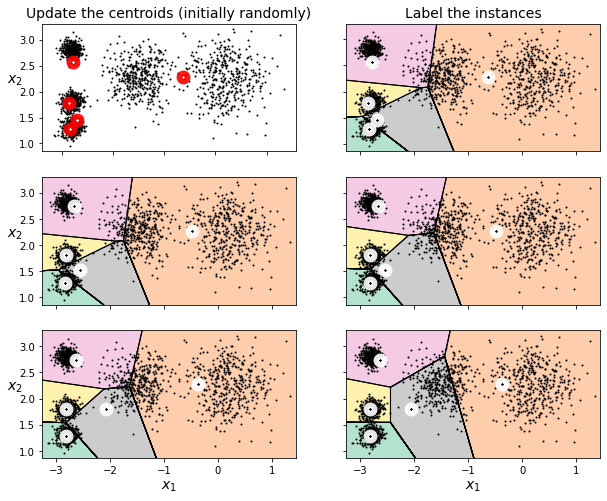

In [18]:
#각 모델별 결정경계 및 센트로이드 그래프..

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

**분석**

- 왼쪽 위에서 센트로이드 랜덤 초기화..
- 오른쪽 위에서 그에 맞게 샘플에 레이블 할당..
- 왼쪽 중앙에서 센트로이드 업데이트..
- 오른쪽 중앙에서 레이블 재할당.
- 반복 시 점점 잘 군집되는 모양새..

####변동성..

- 수렴하는 건 보장되지만 적절성은 보장이 안 된다..
- 초기화에 따라서 다른 군집이 나올 수 있다..

In [19]:
#두 모델의 결정경계를 그리는 함수..
#훈련까지 해줌..
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

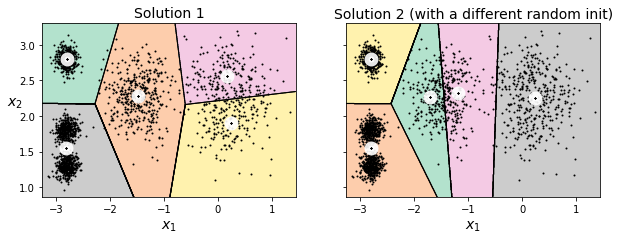

In [20]:
#random_state만 다른 군집기를 생성..
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                          algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                          algorithm="full", random_state=5)

#비교 그래프 그림..
plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

**분석**

- 초기화만 다르게 했는데 최적의 솔루션을 못 찾음..
- 초기화 개선의 필요성을 느낌..

###센트로이드 초기화 방법

**매개변수**

- n_init : 랜덤 초기화 횟수..
    - k-평균 알고리즘 자체가 이 횟수만큼 반복한다..
    - 이중에 최선의 솔루션 반환..
    - 평가지표 : **이너셔**
- init : 원하는 센트로이드 리스트를 넘파이 배열로 전달하면 초기화 가능..

In [21]:
#이렇게 하면 10번(n_init) 초기화해서 최저 이너셔 값을 갖는 모델 반환..

kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                             algorithm="full", random_state=2,
                             precompute_distances=True)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances=True, random_state=2,
       tol=0.0001, verbose=0)

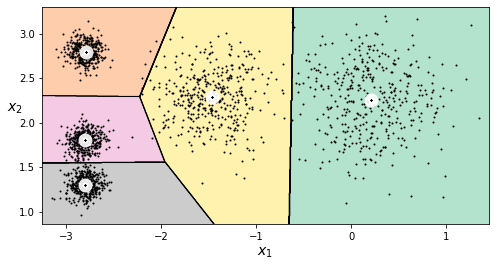

In [22]:
#결국 얘가 최적의 모델을 얻음!

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

####이너셔

각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리

In [23]:
#위의 모델 두 개의 이너셔 확인..

print(kmeans_rnd_init1.inertia_)
print(kmeans_rnd_init2.inertia_)

219.8385799007183
236.94908363907354


In [24]:
#첫 모델(최고의 모델)의 이너셔..

print(kmeans.inertia_)

211.5985372581684


In [25]:
#score()값은 클수록 좋아야하므로 이너셔의 음숫값을 반환..

kmeans.score(X)

-211.59853725816856

####k-평균++ 알고리즘

- 똑똑한 초기화 단계를 제안..
- 이 방법이 KMeans의 init매개변수의 기본값임..
- 최적이 아닌 솔루션으로 수렴할 가능성을 크게 낮춤..
- 계산이 추가되지만, 알고리즘 반복 횟수를 크게 줄일 수 있어 가치가 있다..

**초기화 알고리즘**

- 무작위로 균등하게 하나의 센트로이드 $\mathbf{c}^{(1)}$을 선택한다
- $\dfrac{D(\mathbf{x}^{(i)})^2}{\sum\limits_{j=1}^{m}{D(\mathbf{x}^{(j)})}^2}$의 확률로 샘플 $\mathbf{x}^{(i)}$를 새로운 센트로이드 $\mathbf{c}^{(i)}$로 선택한다
    - 이 확률분포는 이미 선택한 센트로이드에서 멀리 떨어진 샘플을 다음 센트로이드로 선택할 가능성을 높인다
- $k$개의 센트로이드가 선택될 때까지 이전 단계를 반복한다
- 여기서 $D(\mathbf{x}^{(i)})$는 샘플 $\mathbf{x}^{(i)}$에서 이미 선택된 가장 가까운 센트로이드까지 거리

###k-평균 속도 개선과 미니배치 k-평균

####속도 개선

- 삼각부등식을 사용
- 불필요한 거리 계산을 많이 피함 

####미니배치 k-평균

- 각 반복마다 미니배치를 사용해서 센트로이드를 조금씩 이동
- 속도를 3~4배 높임..
- 메모리에 데이터가 다 안드가면 memmap클래스 사용.. & partial_fit()

In [26]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [27]:
minibatch_kmeans.inertia_

211.93186531476775

**미니배치 _vs_ 일반 k-평균 알고리즘**

- 미니배치가 일반보다 훨씬 빠르지만 이너셔는 일반적으로 조금 더 나쁘다..
    - 특히 클러스터 수가 증가할 때!!

timeit 메서드..

- 지정된 문장, setup 코드 및 timer 함수 : Timer 인스턴스를 만듦
- number : timeit() 메서드를 실행
- globals : 코드를 실행할 이름 공간을 지정

In [28]:
#빈 배열 두개 만들어서 훈련 시간 및 이너셔를 저장함..
#11분 소요..

from timeit import timeit

times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

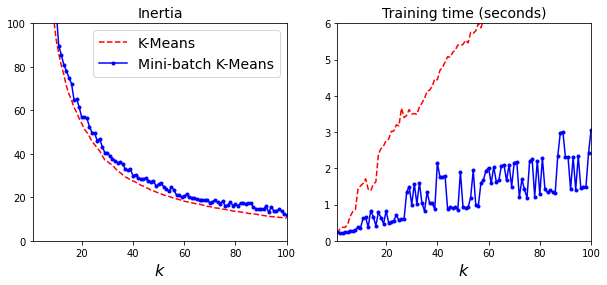

In [29]:
#클러스터 수에 따른 이너셔와 훈련시간 그래프..
plt.figure(figsize=(10,4))

plt.subplot(121)
#클러스터 수에 따른 이너셔 그래프..
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
#클러스터 수에 따른 훈련시간 그래프..
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

plt.show()

**분석**

- 미니배치가 시간은 훨씬 이득이다..
- 하지만 이너셔는 약간 손해를 본다..
    - 전체 이너셔가 줄어들기 때문에 두 모델의 차이가 차지하는 비율은 점점 커진다!

###최적의 클러스터 개수 찾기

- 원래는 $k$도 모른다!!
- 이것도 쉽지는 않다..

####클러스터 수를 다르게 한 결과..

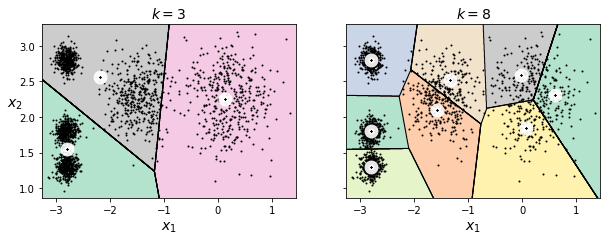

In [30]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

#훈련까지 해줌..
plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

**분석**

- 좋지 않네..

In [31]:
#이너셔나 한번 보자..

print(kmeans_k3.inertia_)
print(kmeans_k8.inertia_)

653.2167190021553
118.41983763508077


#####이너셔는 클러스터수가 증가하면 단순히 계속 작아진다..

In [32]:
#k를 1~9까지 돌리면서 KMeans모델을 훈련 후 이너셔 저장..

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

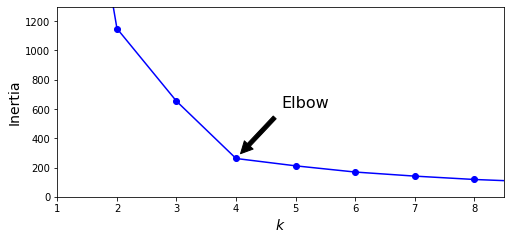

In [33]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])

plt.show()

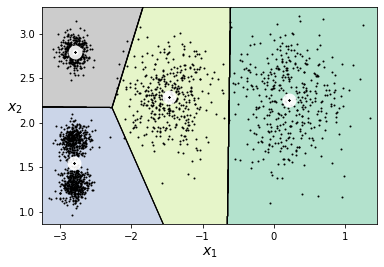

In [34]:
#엘보일 때의 모델을 그림..

plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

**분석**

- $k=4$에 엘보가 있다..
- $k=4$로 해도 좋긴하다..
- 근데 이렇게 엘보 만으로 확인하는 것은 엉성하다..

####실루엣 점수

- 최적의 클러스터 수를 선택하는 정확한 방법..

#####실루엣 점수

- 모든 샘플에 대한 **실루엣 계수**의 평균
- **실루엣 계수** = $\dfrac{(b-a)}{\text{max}(a, b)}$
- $a\text{는 동일한 클러스터에 있는 다른 샘플까지 평균 거리}$
- $b\text{는 가장 가까운 클러스터까지 평균 거리}$
- 실루엣 계수는 -1과 1사이의 값이다..
    - +1 에 가까우면 자신의 클러스터 안에 잘 속해 있다..
    - 0이면 클러스터 경계에 위치..
    - -1 에 가까우면 잘못된 클러스터에 있다..
- silhouette_score()메서드 사용..

In [35]:
from sklearn.metrics import silhouette_score

#샘플과 학습된 클러스터를 전달한다..
silhouette_score(X, kmeans.labels_)

0.655517642572828

**클러스터 수 변화에 따른 실루엣 점수 확인..**

In [36]:
#클러스터 수 : 2 ~ 8..
silhouette_scores = [silhouette_score(X, model.labels_)
                    for model in kmeans_per_k[1:]]

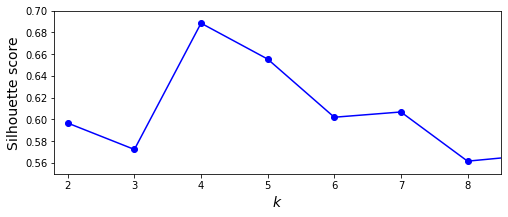

In [37]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

**분석**

- 앞선 이너셔만으로 확인한 그래프보다 많은 정보를 준다..
- $k=4$가 좋은 선택이지만 $k=5$도 좋은 선택이다.. 특히 $k=6, 7$보다는..

#####실루엣 다이아그램

- 모든 샘플의 실루엣 계수를 할당된 클러스터와 계숫값으로 정렬해서 그린 그래프..
- 그래프의 높이 : 클러스터가 포함하는 샘플의 갯수
- 그래프의 너비 : 클러스터에 포함된 샘플의 정렬된 실루엣 계수

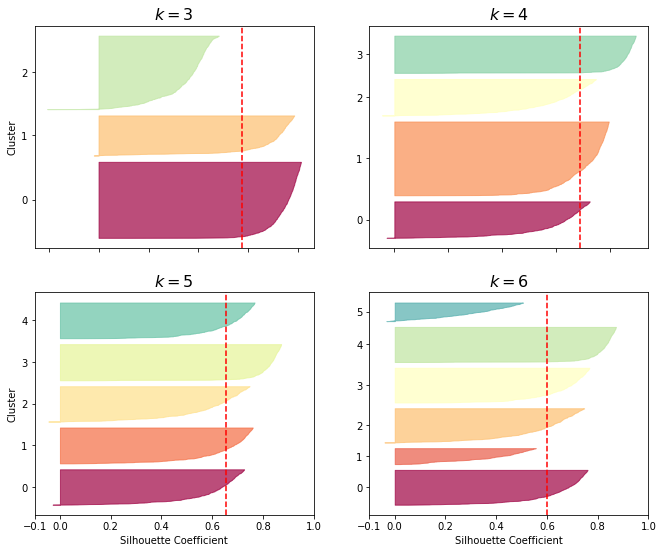

In [43]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_    #클러스터 갯수에 따른 예측..
    silhouette_coefficients = silhouette_samples(X, y_pred) #실루엣 계수..

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    #수직 파선을 그리기..
    #각 클러스터에 해당하는 실루엣 점수..
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

**분석**

- 더 많은 정보를 얻을 수 있다..
- 수직 파선 
    - 각 클러스터에 해당하는 실루엣 점수( 각 샘플의 실루엣 계수의 평균 )
    - 한 클러스터의 대부분이 실루엣 점수보다 낮으면 안 좋다.. (다른 클러스터랑 가깝다는 말임..)
- 위의 관점에서 보면 $k = 3, 6$은 2개의 클러스터가 수직파선을 넘지 못했다..
    - 안 좋다!!
- 또한 $k = 4, 5$인 경우는 상당히 좋다..
    - 하지만 전반적으로 점수가 높더라도 **비슷한 크기의 클러스터를 얻을 수 있는 $k = 5$가 제일 좋다..**

##9.1.2 k-평균의 한계

- 최적이 아닌 솔루션을 피하려면 알고리즘을 반복 실행해야 한다
- 클러스터의 갯수를 지정해야 한다
- **클러스터의 크기나 밀집도가 서로 다르**거나 **원형이 아닐 경우** 잘 작동하지 않는다

In [49]:
#데이터 생성..

#중심을 (4, -4), (0, 0)으로 하는 임의의 데이터를 1000개 뽑음..
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
#적절히 변환함..
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
#중심을 1로 하는 임의의 데이터를 250개 뽑음..
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
#적절한 변환..
X2 = X2 + [6, -8]

#배열을 옆으로 붙히기..
#결론은 총 1250개의 데이터를 사용하겠다..
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [50]:
X.shape, y.shape

((1250, 2), (1250,))

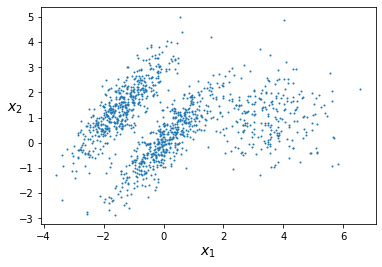

In [51]:
plot_clusters(X)

In [53]:
#두개의 KMeans 모델 생성 및 훈련..

kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]),
                     n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

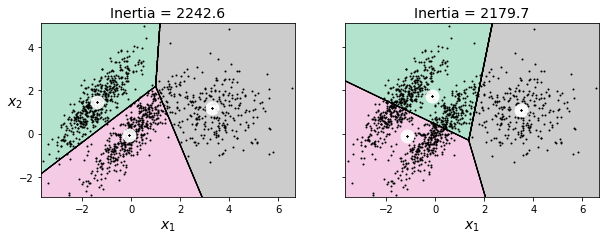

In [55]:
#plot_clusterer_comparision()메서드로도 출력 가능..

plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

**분석**

- 왼쪽은 그나마 좋은데 중간 클러스터의 25%정도가 잘못 할당됨..
- 오른쪽은 이너셔는 낮지만 끔찍함..
- 이런 타원형 클러스터에는 **가우시안 혼합 모델**이 잘 작동한다..

##9.1.3 군집을 사용한 이미지 분할

**이미지 분할**

- 이미지를 세그먼트 여러 개로 분할하는 작업

**시맨틱 분할**

- 동일한 종류의 물체에 속한 모든 픽셀은 같은 세그먼트에 할당됨
- ex) 사람에 속한 픽셀이면 그냥 사람으로 같이 인식됨.. 손이든 발이든 간에..

**색상 분할**

- 위의 두 개보다는 훨 쉽다..
- 같은 색상을 갖는 픽셀을 세그먼트에 할당한다..

In [56]:
#ladybug 이미지 가져오기.. 마운트..

from matplotlib.image import imread
image = imread("/content/drive/MyDrive/Colab Notebooks/핸즈온머신러닝/new/ladybug.png")

In [57]:
#(높이, 너비, 컬러 채널 개수)

image.shape

(533, 800, 3)

In [58]:
#shape을 바꾸고 색상을 클러스터로 모은다..

X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)

#훈련 결과 해당하는 인덱스의 센터로이드로 저장..
#각 픽셀의 컬러 클러스터의 평균 컬러를 찾는다..
segmented_img = kmeans.cluster_centers_[kmeans.labels_]

#다시 출력을 위해 모양을 바꿈..
segmented_img = segmented_img.reshape(image.shape)

####클러스터 수(색상 갯수)에 따른 색상 분할 결과

In [59]:
#이미지 저장할 빈 배열
segmented_imgs = []
#색상 갯수 지정..
n_colors = (10, 8, 6, 4, 2)
#색상 갯수마다 위의 과정을 반복..
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

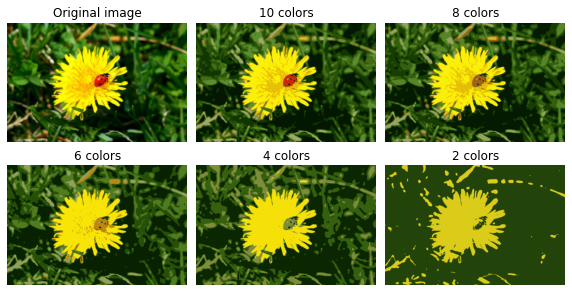

In [60]:
#그리자..

plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

#원본은 그냥 그리고,
plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

#색상 분할한 거는 따로 segmented_imgs리스트에서 가져와서 그린다..
for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

**분석**

- K-평균은 비슷한 크기의 클러스터를 만드는 경향이 있다
- 무당벌레의 빨간색은 나머지 부분보다 훨씬 작아서 클러스터 수를 줄이면 하나의 클러스터로 남지 못한다..

##9.1.4 군집을 사용한 전처리

- 군집은 차원 축소에 효과적이다
- **클러스터 수가 축소되는 차원이 된다**

####원본 데이터로 분류 작업

In [79]:
#데이터 준비..

from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [ ]:
#로지스틱 회귀 모델 훈련..

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

In [82]:
#정확도 평가.. 차원축소하지 않은 상태의 정확도..

log_reg_score = log_reg.score(X_test, y_test)
log_reg_score

0.9688888888888889

####임의의 k(50) 차원으로 축소 후 분류

차원 축소를 한다면??

- 군집으로 차원 축소 후 훈련하는 파이프라인 적용..
- 군집이 전처리에 사용됨,,
- 임의로 50개만 해보자..

In [ ]:
#차원 축소(전처리) 후 훈련..
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=50, random_state=42)),
        ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

In [84]:
#점수 확인..

pipeline_score = pipeline.score(X_test, y_test)
pipeline_score

0.98

**분석**

- 성능이 향상 되었다!!
- 임의로 50개의 클러스터를 지정한거니까 더 좋은 k도 찾을 수 있다!!

####그리드 서치로 최적의 k 탐색

- 최적의 k는 교차검증 점수가 가장 높도록 하는 값이다!!

In [85]:
#16분 소요..

from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2, n_jobs=-1)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 294 out of 294 | elapsed: 16.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=50, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=42, tol=0.0001,
                                               verbose=0)),
                                       ('log_reg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                      

In [86]:
#최적의 k는..??

grid_clf.best_params_

{'kmeans__n_clusters': 57}

##9.1.5 군집을 사용한 준지도 학습

##9.1.6 DBSCAN

##9.1.7 다른 군집 알고리즘

###병합 군집

###BIRCH

###평균-이동

###유사도 전파

###스펙트럼 군집

#9.2 가우시안 혼합

##9.2.1 가우시안 혼합을 사용한 이상치 탐지

##9.2.2 클러스터 개수 선택하기

##9.2.3 베이즈 가우시안 혼합 모델

##9.2.4 이상치 탐지와 특이치 탐지를 위한 다른 알고리즘

#9.3 연습문제